### Mini_proj_basic_DSCR
1. EDA
    1. 범주형 데이터 gender, oral, tartar 를 0과 1로 라벨링
    2. object형 데이터 변환
2. 훈련 
    1. random_state = 42로 설정
    2. model
        - DecisionTreeClassifier
        - RandomForestClassifier
        - XGBoost
        - LGBMClassifier
        - Logistic Regression
        - Support Vector Machine
    3. 예측 후 confusion_matrix 확인
    4. classification_report 확인

### EDA

- gender 성별
- age 나이
- height 키
- weight 몸무게
- eyesight(left, right) 왼쪽 시력, 오른쪽 시력
- hearing(left, right) 왼쪽 청력, 오른쪽 청력

- systolic 최고혈압(대동맥 내로 보내지는 심실 수축기의 혈압)
- relaxation 최저혈압
- fasting blood sugar 공복혈당
- Cholesterol 총 콜레스테롤
- triglyceride 중성지방
- HDL 고밀도지단백 (콜레스테롤)
- LDL 저밀도지단백 (콜레스테롤)
- hemoglobin 헤모글로빈 수치
- Urine protein 단백뇨
- serum creatinine 혈액 또는 소변에서 크레아티닌 양 측정 - *신장*관련

- AST 아스파르테이트 아미노 전달효소 *간*
- ALT 알라닌 아미노 전달효소 *간* 
    - AST, ALT의 정상 범위 ~40, 경도 40~ 200, 중등도 200~400, 중증 400~
- Gtp 감마 Gtp간 기능 검사 *알코올 관련*
    - 정상 ~50, 가벼운 증가 51~100, 중간정도의 증가 101~200, 고도의 증가 201~500, 초고도 증가 500~
    - 술 마시지 않는 사람도 높게 나올 수 있다.
    
- oral 구강검사 여부
- dental caries 충치 갯수
- tartar 치석존재여부

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
df = pd.read_csv('../../ML_DATA/smoking.csv')
df.shape  # (55693, 27)

(55692, 27)

In [4]:
# 범주형 데이터 변환
df = df.replace({'N':0,'Y':1,'F':0,'M':1, })
gender = {'F': 0, 'M': 1}
oral = {'N': 0, 'T': 1}
tartar = {'N': 0, 'T': 1}
# df 전체 float형으로 바꾸기
df = df.astype(float)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(df.iloc[:,:-1],df.iloc[:,-1], test_size=0.2, random_state=42)

### 3. 훈련01

### 분류성능평가지표
- True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답)
- False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답)
- False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답)
- True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답)


1. Precision(정밀도)
    - 정밀도란 **모델이 True라고 분류한 것 중에서 실제 True**인 것의 비율입니다. 
    - Positive 정답률, PPV(Positive Predictive Value)라고도 불립니다. 
    - 날씨 예측 모델이 맑다로 예측했는데, 실제 날씨가 맑았는지를 살펴보는 지표라고 할 수 있겠습니다.
2. Recall(재현율)
    - 재현율이란 **실제 True인 것 중에서 모델이 True**라고 예측한 것의 비율입니다. 
    - 통계학에서는 sensitivity으로, 그리고 다른 분야에서는 hit rate라는 용어로도 사용합니다
    - 실제 날씨가 맑은 날 중에서 모델이 맑다고 예측한 비율을 나타낸 지표
3. Accuracy(정확도)
    - False를 False라고 예측한 경우
    - 정확도는 가장 직관적으로 모델의 성능을 나타낼 수 있는 평가 지표
    - domain의 편중(bias)
        - 만약 우리가 예측하고자 하는 한달 동안이 특정 기후에 부합하여 비오는 날이 흔치 않다고 생각해보죠. 이 경우에는 해당 data의 domain이 불균형하게되므로 맑은 것을 예측하는 성능은 높지만, 비가 오는 것을 예측하는 성능은 매우 낮을 수 밖에 없습니다. 따라서 이를 보완할 지표가 필요합니다.
4. F1 score
    - F1 score는 Precision과 Recall의 조화평균
    - F1 score는 **데이터 label이 불균형 구조**일 때, 모델의 성능을 정확하게 평가할 수 있으며, 성능을 하나의 숫자로 표현
    - 산술평균을 이용하는 것보다, 큰 비중이 끼치는 bias가 줄어든다
    

- $Precision =\frac{TP}{TP+FP}=\frac{T를 T로 예측}{T를 T로 예측+F를 T로 예측} $
- $Recall =\frac{TP}{TP+FN}=\frac{T를 T로 예측}{T를 T로 예측+T를 F로 예측} $
- $Accuracy =\frac{TP+TN}{TP+TN+FP+FN}=\frac{T를 T로 예측 + F를 F로 예측}{모든 예측} $
- $F1 score =2*\frac{1}{\frac{1}{Precision}+\frac{1}{Recall}}=2*\frac{Precision*Recall}{Precision+Recall}$
 
reference[분류성능평가지표 - Precision(정밀도), Recall(재현율) and Accuracy(정확도)](https://sumniya.tistory.com/26)

#### DecisionTreeClassifier

DecisionTreeClassifier()

0.766765418798815

confusion_matrix : 
 [[5726 1301]
 [1297 2815]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

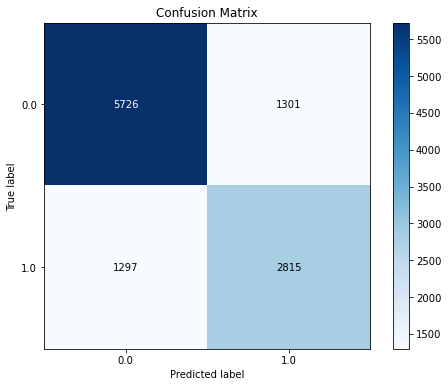

리포트:
 {'0.0': {'precision': 0.8153210878541933, 'recall': 0.8148569802191546, 'f1-score': 0.8150889679715303, 'support': 7027}, '1.0': {'precision': 0.6839164237123421, 'recall': 0.6845817120622568, 'f1-score': 0.6842489061740399, 'support': 4112}, 'accuracy': 0.766765418798815, 'macro avg': {'precision': 0.7496187557832676, 'recall': 0.7497193461407057, 'f1-score': 0.7496689370727851, 'support': 11139}, 'weighted avg': {'precision': 0.7668126060379359, 'recall': 0.766765418798815, 'f1-score': 0.7667889110444022, 'support': 11139}}


In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

cl_report = metrics.classification_report(y_test,pred,output_dict=True)
print('리포트:\n',cl_report)

In [85]:
# classification_report의 output_dict=True 이면 데이터프레임으로 바꿀 수 있다

def test(data_name, scaler, model_name, report):

    df = pd.DataFrame(report).transpose()

    name_list = []
    scaler_list = []
    for i in range(5):
        name_list.append(model_name)
        scaler_list.append(scaler)
        
    df = df.reset_index().rename(columns={"index": "report"})
    df = pd.concat([pd.Series(name_list),pd.Series(scaler_list),df], axis=1).rename(columns={0: "model_name",1:"scaler"})
    return df

df = test(data_name='a', scaler='MinMaxScaler', model_name='DecisionTreeClassifier', report=cl_report).head()
df

,model_name,scaler,report,precision,recall,f1-score,support
0,DecisionTreeClassifier,MinMaxScaler,0.0,0.815321,0.814857,0.815089,7027.000000
1,DecisionTreeClassifier,MinMaxScaler,1.0,0.683916,0.684582,0.684249,4112.000000
2,DecisionTreeClassifier,MinMaxScaler,accuracy,0.766765,0.766765,0.766765,0.766765
3,DecisionTreeClassifier,MinMaxScaler,macro avg,0.749619,0.749719,0.749669,11139.000000
4,DecisionTreeClassifier,MinMaxScaler,weighted avg,0.766813,0.766765,0.766789,11139.000000


In [93]:
def reportTocsv(data_name, scaler, model_name, report):
    now = datetime.now()
    # 폴더가 없으면 생성 있으면 통과
    try:
        if not os.path.exists('modeldata'):
            os.makedirs('modeldata')
    except OSError:
        print ('Error: Creating directory. modeldata')
    
    # 파일 경로
    file_path = './modeldata/' + data_name + 'report.csv'
    # 시간 불러오기
    date =  now.strftime('%Y-%m-%d %H:%M:%S')
    
    #리스트 파일 만들기
    date_list = []    
    name_list = []
    scaler_list = []
    for i in range(5):
        name_list.append(model_name)
        scaler_list.append(scaler)
        date_list.append(date)
        df = pd.DataFrame(report).transpose()
        df = df.reset_index().rename(columns={"index": "report"})    
    
    # 파일이 없으면 생성 있으면 불러오기
    if os.path.isfile('./modeldata/' + data_name + 'report.csv'): # 파일 존재
        df_exist = pd.read_csv(file_path)
        df_new = pd.concat([pd.Series(date_list),pd.Series(name_list),pd.Series(scaler_list),df], axis=1).rename(columns={0:"datetime", 1:"model_name", 2:"scaler"})
        df = pd.concat([df_exist,df_new],axis=0)
        df.to_csv(file_path, index=False)
        
    else: # 파일 존재하지 않음       
        df = pd.concat([pd.Series(date_list),pd.Series(name_list),pd.Series(scaler_list),df], axis=1).rename(columns={0:"datetime", 1:"model_name", 2:"scaler"})
        df.to_csv(file_path, index=False)
        
test(data_name='obesity', scaler='MinMaxScaler', model_name='RandomForestClassifier', report=cl_report)

In [92]:
import pandas as pd
from datetime import datetime
import os

            
def paramsTocsv(data_name, scaler, model_name, best_params, best_score):
    now = datetime.now()
    # 폴더가 없으면 생성 있으면 통과
    try:
        if not os.path.exists('modeldata'):
            os.makedirs('modeldata')
    except OSError:
        print ('Error: Creating directory. modeldata')
    
    # 파일 경로
    file_path = './modeldata/' + data_name + '.csv'
    # 시간 불러오기
    date =  now.strftime('%Y-%m-%d %H:%M:%S')
    
    # 파일이 없으면 생성 있으면 불러오기
    if os.path.isfile('./modeldata/' + data_name + '.csv'): # 파일 존재
        df_exist = pd.read_csv(file_path)
        df_nonparam = pd.DataFrame([{'date':date,'model_name':model_name,'scaler':scaler,'best_score':best_score}]) #시간 + score 데이터
        new_param=pd.DataFrame([best_params])
        
        df_new = pd.concat([df_nonparam,new_param],axis=1)
        df = pd.concat([df_exist,df_new],axis=0)
        df.to_csv(file_path, index=False)
        
    else: # 파일 존재하지 않음
        df_nonparam = pd.DataFrame([{'date':date,'model_name':model_name,'scaler':scaler,'best_score':best_score}]) #시간 + score 데이터
        df_param=pd.DataFrame([best_params])
        df = pd.concat([df_nonparam,df_param],axis=1)
        df.to_csv(file_path, index=False)


In [ ]:
def reportTocsv(model_name, ):